In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('student_scores.csv')

In [5]:
df.value_counts()

Hours  Scores
1.1    17        1
5.1    47        1
8.9    95        1
8.5    75        1
8.3    81        1
7.8    86        1
7.7    85        1
7.4    69        1
6.9    76        1
6.1    67        1
5.9    62        1
5.5    60        1
4.8    54        1
1.5    20        1
4.5    41        1
3.8    35        1
3.5    30        1
3.3    42        1
3.2    27        1
2.7    30        1
       25        1
2.5    30        1
       21        1
1.9    24        1
9.2    88        1
dtype: int64

In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
print(df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [8]:
df.shape

(25, 2)

<Axes: title={'center': 'Scatterplot of hours and scores percentages'}, xlabel='Hours', ylabel='Scores'>

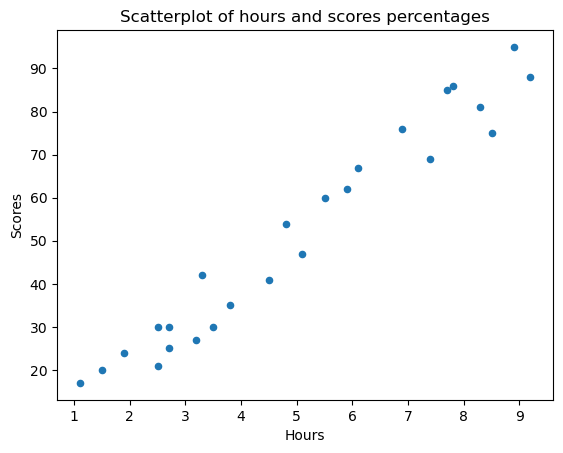

In [9]:
#plt.scatter(x=df['Hours'], y=df['Scores'])
#plt.title('Scatterplot of hours and scores percentages')

df.plot.scatter(x='Hours', y='Scores', title='Scatterplot of hours and scores percentages')

In [10]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [13]:
y = df['Scores'].values.reshape(-1, 1)
X = df['Hours'].values.reshape(-1, 1)

In [14]:
print('X shape:', X.shape, X.ndim)
print('X:', X)

print('y shape:', y.shape, y.ndim)


X shape: (25, 1) 2
X: [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
y shape: (25, 1) 2


In [15]:
print(df['Hours'].values) # [2.5 5.1 3.2 8.5 3.5 1.5 9.2 ... ]
print(df['Hours'].values.shape) # (25,)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
(25,)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [17]:
print(y_train)

[[25]
 [42]
 [47]
 [35]
 [20]
 [27]
 [41]
 [95]
 [75]
 [30]
 [30]
 [24]
 [54]
 [67]
 [86]
 [60]
 [85]
 [17]
 [69]
 [88]]


In [18]:
print(X_train)

[[2.7]
 [3.3]
 [5.1]
 [3.8]
 [1.5]
 [3.2]
 [4.5]
 [8.9]
 [8.5]
 [3.5]
 [2.7]
 [1.9]
 [4.8]
 [6.1]
 [7.8]
 [5.5]
 [7.7]
 [1.1]
 [7.4]
 [9.2]]


In [19]:
print(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [20]:
print(y_test)

[[81]
 [30]
 [21]
 [76]
 [62]]


In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
regressor.intercept_
# c-intercept 

array([2.82689235])

In [23]:
regressor.coef_
# Slope

array([[9.68207815]])

In [24]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

In [25]:
score = calc(regressor.coef_, regressor.intercept_, 9.5)
print(score)

[[94.80663482]]


In [26]:
score = calc(regressor.coef_, regressor.intercept_, 7)
print(score)

[[70.60143944]]


In [27]:
score = regressor.predict([[9.5]])
print(score)

[[94.80663482]]


In [28]:
y_pred = regressor.predict(X_test)

In [29]:
type(y_pred)

numpy.ndarray

In [30]:
y_pred.ndim

2

In [32]:
y_pred.shape

(5, 1)

In [33]:
y_pred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

`squeeze()` is a method being used on the Pandas Series objects `y_test` and `y_pred`. 

The `squeeze()` method in Pandas is used to remove single-dimensional entries from the shape of a DataFrame or Series and return a lower-dimensional result. It's often used when you have a DataFrame or Series with only one column or axis and you want to convert it into a one-dimensional Series.


1. `y_test.squeeze()`: If `y_test` is a DataFrame or Series with only one column, `squeeze()` will convert it into a one-dimensional Series, essentially removing any unnecessary dimensions. This is done to ensure that both 'Actual' and 'Predicted' columns have the same shape when creating the `df_preds` DataFrame.

2. `y_pred.squeeze()`: Similarly, if `y_pred` is a DataFrame or Series with only one column, `squeeze()` will also convert it into a one-dimensional Series.

The purpose of using `squeeze()` in this context is to ensure that both 'Actual' and 'Predicted' columns have the same shape when creating the `df_preds` DataFrame, making it easier to compare the actual and predicted values side by side in tabular form. It's a common practice when working with machine learning models to organize the data for analysis or evaluation.

In [34]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), \
                         'Predicted': y_pred.squeeze()})
print(df_preds)

   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [36]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288


https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

https://medium.com/wwblog/evaluating-regression-models-using-rmse-and-r%C2%B2-42f77400efee#:~:text=they%20tell%20us.-,Root%20mean%20squared%20error%20(RMSE),low%20RMSE%20is%20%E2%80%9Cgood%E2%80%9D.

Use Multiple Linear Regression to predict the consumption of petrol given relevant variables are the petrol tax, the per capita income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

In [37]:
df = pd.read_csv('petrol_consumption.csv')

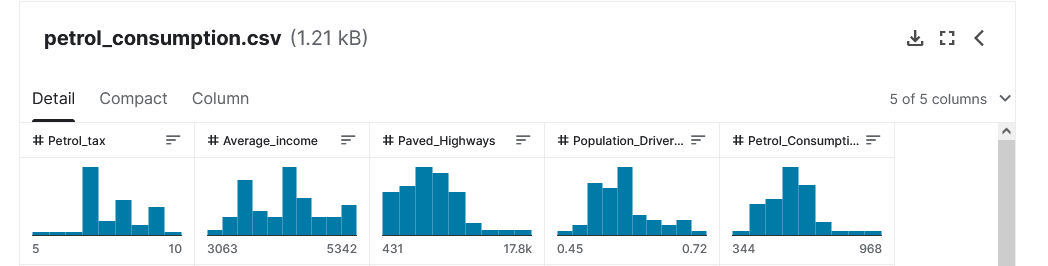

In [38]:
df.value_counts()

Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  Petrol_Consumption
5.00        4045            17782           0.566                         640                   1
6.00        5215            2302            0.672                         782                   1
8.00        3063            6524            0.578                         577                   1
            3448            5399            0.548                         577                   1
            3528            3495            0.487                         487                   1
            4188            5975            0.563                         574                   1
            4391            5939            0.530                         580                   1
            4399            431             0.544                         410                   1
            4447            8577            0.529                         464                   1
            4983         

In [39]:
df2 = df.value_counts()

In [42]:
df2.to_csv("values.csv")


In [43]:
l1 = ["send mail", "cooking", "studying"]

In [44]:
for s1,s2 in enumerate(l1):
    print(s1,s2)

0 send mail
1 cooking
2 studying


In [45]:
for s1,s2 in enumerate(l1):
    print(s1)

0
1
2


In [46]:
for s1,s2 in enumerate(l1):
    print(s2)

send mail
cooking
studying


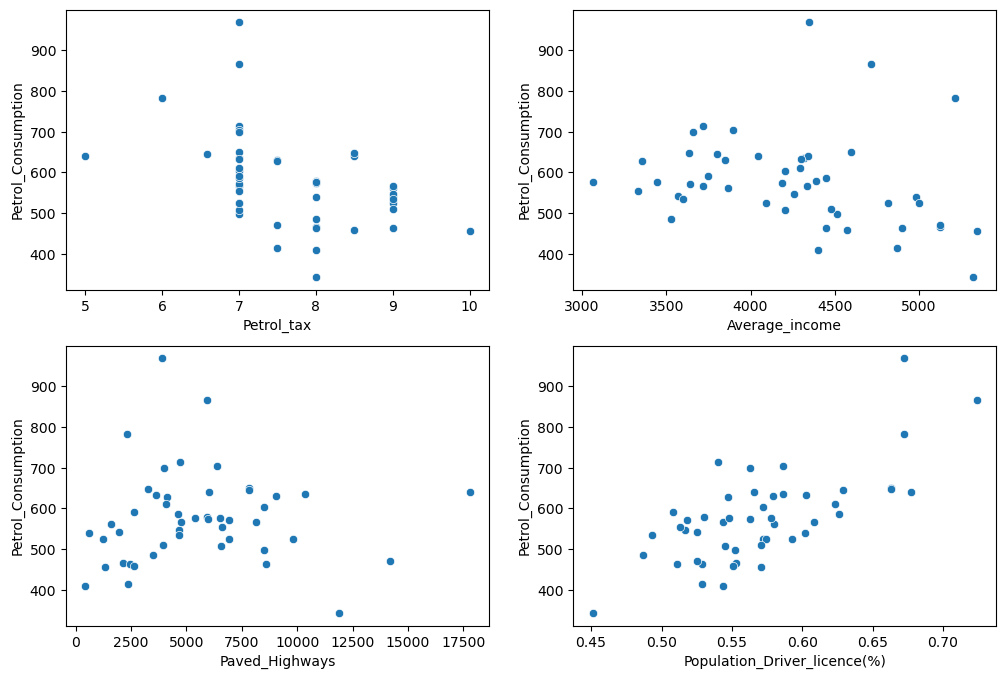

In [47]:
import seaborn as sns # Convention alias for Seaborn

variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for index, var in enumerate(variables):
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.scatterplot(x=var, y='Petrol_Consumption', data=df, ax=ax[int(np.ceil((index+1)/2))-1][int(np.mod(index, 2))])


In [48]:
import numpy as np
int(np.ceil(1/2))

1

In [49]:
np.mod(0,2)
0%2

0

In [50]:
5%2

1

In [51]:
int(np.ceil((0+1)/2))-1, int(np.mod(0, 2))

(0, 0)

In [52]:
int(np.ceil((1+1)/2))-1, int(np.mod(1, 2))

(0, 1)

In [53]:
int(np.ceil((2+1)/2))-1, int(np.mod(2, 2))

(1, 0)

In [54]:
int(np.ceil((3+1)/2))-1, int(np.mod(3, 2))

(1, 1)

In [55]:
0%2


0

In [56]:
1%2

1

It plots the relationship between one of the four independent variables var (Petrol_tax, Average_income, Paved_Highways or Population_Driver_licence(%)) and the dependent variable Petrol_Consumption from the given df DataFrame. The plot is added to one of the subplots of a 2x2 grid of plots, as specified by the ax argument.

The ax argument specifies the axes object where the plot will be drawn. The axes object is a 2D array of subplot axes where each subplot will represent a scatter plot of one of the independent variables against the dependent variable. The ax argument is indexed using int(np.ceil((index+1)/2))-1 for the row index and int(np.mod(index, 2)) for the column index.

The int(np.ceil((index+1)/2))-1 expression calculates the row index for the current subplot. The index variable is the current index of the for loop, which ranges from 0 to 3. The np.ceil() function is used to round up the result of the division of (index+1) by 2. This is done to ensure that the plots are assigned to the correct row, depending on whether index is an even or odd number. The int() function is used to convert the result to an integer. Since the row indices are zero-based, we subtract 1 from the result.

The int(np.mod(index, 2)) expression calculates the column index for the current subplot. The np.mod() function is used to calculate the remainder of the division of index by 2, which will be either 0 or 1. This is done to ensure that the plots are assigned to the correct column.

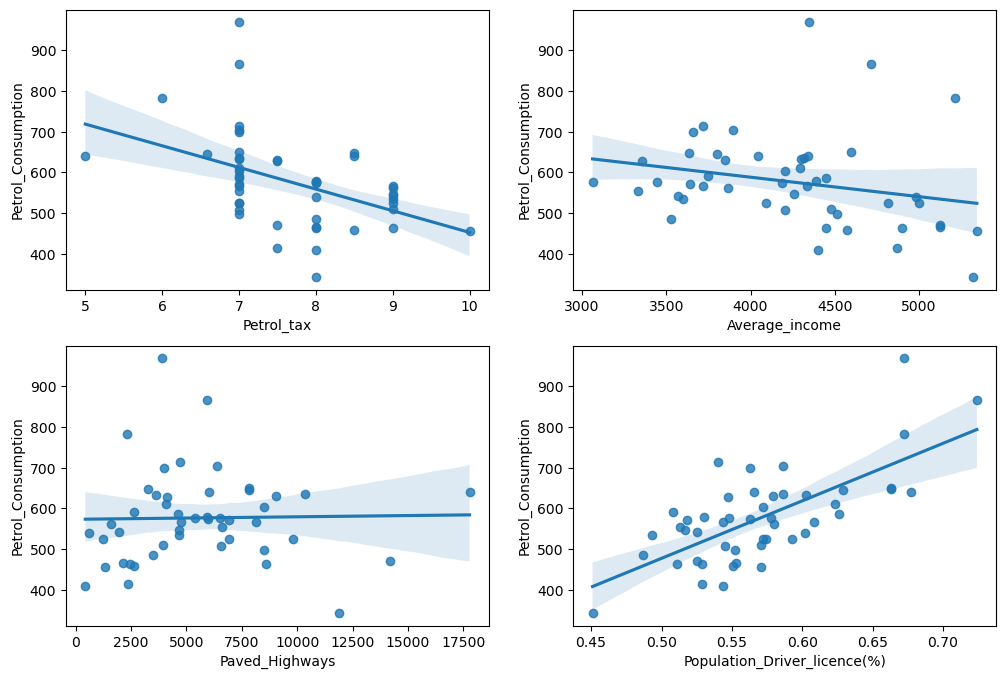

In [57]:
import seaborn as sns # Convention alias for Seaborn

variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for index, var in enumerate(variables):
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Petrol_Consumption', data=df, ax=ax[int(np.ceil((index+1)/2))-1][int(np.mod(index, 2))])


In [24]:
correlations = df.corr()

In [25]:
correlations

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


[Text(0.5, 1.0, 'Heatmap of Consumption Data -Pearson Correlations')]

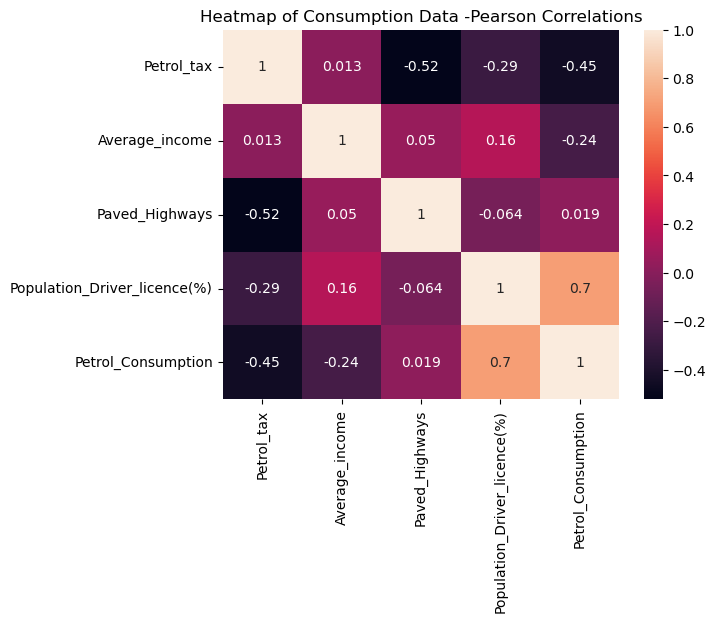

In [26]:
correlations = df.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).\
set(title='Heatmap of Consumption Data -Pearson Correlations')

# annot=True - prints correlation values 

In [60]:
y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [64]:
print(X_train)
print(X_train.shape, X_train.ndim)

    Average_income  Paved_Highways  Population_Driver_licence(%)  Petrol_tax
8             4447            8577                         0.529        8.00
3             4870            2351                         0.529        7.50
6             5319           11868                         0.451        8.00
39            4345            3905                         0.672        7.00
33            3357            4121                         0.547        7.50
13            4207            6580                         0.545        7.00
17            3718            4725                         0.540        7.00
45            4476            3942                         0.571        9.00
15            4318           10340                         0.586        7.00
9             4512            8507                         0.552        7.00
16            4206            8508                         0.572        7.00
29            3601            4650                         0.493        9.00

In [65]:
X_test, X_test.shape

(    Average_income  Paved_Highways  Population_Driver_licence(%)  Petrol_tax
 27            3846            9061                         0.579         7.5
 40            4449            4639                         0.626         7.0
 26            3448            5399                         0.548         8.0
 43            3745            2611                         0.508         7.0
 24            4574            2619                         0.551         8.5
 37            3897            6385                         0.586         7.0
 12            4817            6930                         0.574         7.0
 19            4341            6010                         0.677         8.5
 4             4399             431                         0.544         8.0
 25            3721            4746                         0.544         9.0,
 (10, 4))

In [66]:
X.shape # (48, 4)

(48, 4)

In [67]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [68]:
regressor.intercept_

361.45087906668357

In [69]:
regressor.coef_

array([-5.65355145e-02, -4.38217137e-03,  1.34686930e+03, -3.69937459e+01])

In [70]:
df.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [71]:
X.columns

Index(['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)',
       'Petrol_tax'],
      dtype='object')

In [72]:
feature_names = X.columns

In [73]:
type(feature_names)

pandas.core.indexes.base.Index

In [74]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

                              Coefficient value
Average_income                        -0.056536
Paved_Highways                        -0.004382
Population_Driver_licence(%)        1346.869298
Petrol_tax                           -36.993746


In [75]:
y_pred = regressor.predict(X_test)

In [76]:
X_test

,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_tax
27,3846,9061,0.579,7.5
40,4449,4639,0.626,7.0
26,3448,5399,0.548,8.0
43,3745,2611,0.508,7.0
24,4574,2619,0.551,8.5
37,3897,6385,0.586,7.0
12,4817,6930,0.574,7.0
19,4341,6010,0.677,8.5
4,4399,431,0.544,8.0
25,3721,4746,0.544,9.0


In [80]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 53.47
Mean squared error: 4083.26
Root mean squared error: 63.90


In [85]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.391366400143053


In [83]:
regressor.score(X_test, y_test)  # .score gives the value of R^2 . R is the coefficient of determination. 

0.391366400143053

In [84]:
regressor.score(X_train, y_train)

0.7068781342155135

In [56]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california_housing = fetch_california_housing()

# Convert the data to a pandas dataframe
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['target1'] = california_housing.target * 1000 # First target variable
df['target2'] = np.log(california_housing.target) # Second target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target1', 'target2'], axis=1), 
                                                    df[['target1', 'target2']], test_size=0.2, random_state=42)

# Create an instance of the Linear Regression model and fit the model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error and r-squared metrics for target1
print("Mean squared error for target1: %.2f"
      % mean_squared_error(y_test['target1'], y_pred[:,0]))
print('R-squared score for target1: %.2f' % r2_score(y_test['target1'], y_pred[:,0]))

# Evaluate the model using mean squared error and r-squared metrics for target2
print("Mean squared error for target2: %.2f"
      % mean_squared_error(y_test['target2'], y_pred[:,1]))
print('R-squared score for target2: %.2f' % r2_score(y_test['target2'], y_pred[:,1]))


Mean squared error for target1: 555891.60
R-squared score for target1: 0.58
Mean squared error for target2: 0.13
R-squared score for target2: 0.59


In [57]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target1,target2
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4526.0,1.509839
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3585.0,1.276758
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3521.0,1.258745
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3413.0,1.227592
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3422.0,1.230225
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,781.0,-0.247180
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,771.0,-0.260067
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,923.0,-0.080126
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,847.0,-0.166055


https://satishgunjal.com/multivariate_lr_scikit/